## Libraries

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from fbprophet import Prophet
# from fbprophet.diagnostics import cross_validation
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.plot import plot_cross_validation_metric

## Read Data

In [ ]:
filename = "../data/data.csv"

In [ ]:
df = pd.read_csv(filename)

In [ ]:
df.count()

In [ ]:
df.head()

### Convert index to datetime

In [ ]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

### Verify that no value is null

In [ ]:
df.isna().sum()

In [ ]:
df['consumption'] = df['consumption'] + 1

In [ ]:
min(df.consumption)

In [ ]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [ ]:
df.nlargest(10,'consumption')

In [ ]:
df = df.reset_index()

In [ ]:
df.count()

## Changing dataframe format specific to Prophet Model

In [ ]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [ ]:
df.count()

In [ ]:
df.nlargest(10,'y')

In [ ]:
# df.y = np.log(df.y)

## Model Fitting

In [ ]:
model = Prophet()
model.add_country_holidays(country_name='IN')

In [ ]:
model.fit(df)

In [ ]:
model.train_holiday_names

## Predictions

In [ ]:
# future = model.make_future_dataframe(periods=365)

In [22]:
# future.head()

In [23]:
prediction=model.predict(df)

In [24]:
org_prediction = prediction.copy()

In [25]:
# prediction[prediction.columns[1:]] = np.exp(prediction[prediction.columns[1:]])

In [26]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3789,2019-05-28 11:00:01,639.731394,769.221362,1246.995267,639.731394,639.731394,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,125.921971,125.921971,125.921971,0.0,0.0,0.0,1005.101269
3621,2019-05-21 11:00:02,638.172570,770.980711,1240.743304,638.172570,638.172570,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,125.920725,125.920725,125.920725,0.0,0.0,0.0,1003.536336
3788,2019-05-28 10:00:02,639.869814,753.392812,1219.118516,639.869814,639.869814,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,130.259853,130.259853,130.259853,0.0,0.0,0.0,998.060950
3620,2019-05-21 10:00:02,638.132469,752.144673,1227.539049,638.132469,638.132469,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,130.259853,130.259853,130.259853,0.0,0.0,0.0,996.323605
3453,2019-05-14 11:00:02,629.329197,753.212428,1231.895988,629.329197,629.329197,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,125.920725,125.920725,125.920725,0.0,0.0,0.0,994.692962
3452,2019-05-14 10:00:02,629.172075,752.579024,1215.855870,629.172075,629.172075,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,130.259853,130.259853,130.259853,0.0,0.0,0.0,987.363211
3957,2019-06-04 11:00:03,616.470235,750.667337,1224.743447,616.470235,616.470235,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,125.919478,125.919478,125.919478,0.0,0.0,0.0,981.827887
2838,2019-04-18 11:00:02,531.284959,745.289076,1239.311757,531.284959,531.284959,0.0,0.0,0.0,0.0,...,117.784786,117.784786,117.784786,89.435725,89.435725,89.435725,0.0,0.0,0.0,977.948512
3956,2019-06-04 10:00:02,616.608732,738.333590,1213.742399,616.608732,616.608732,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,130.259853,130.259853,130.259853,0.0,0.0,0.0,974.799868
3790,2019-05-28 12:00:02,639.592897,736.561723,1208.577498,639.592897,639.592897,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,121.314871,121.314871,121.314871,0.0,0.0,0.0,970.664208


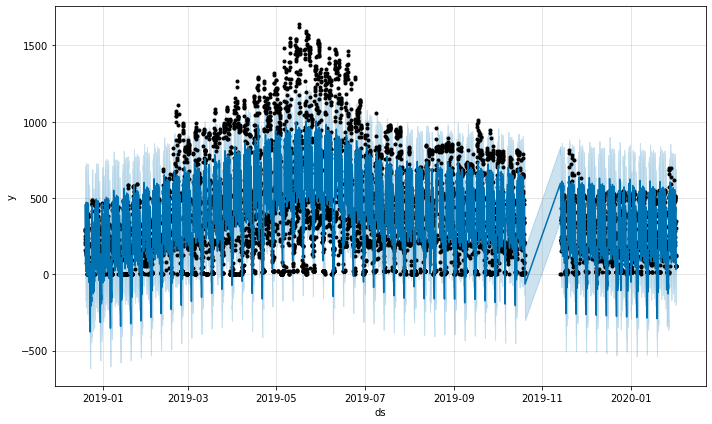

In [27]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

In [28]:
# prediction[prediction.columns[1:]] = np.exp(prediction[prediction.columns[1:]])

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



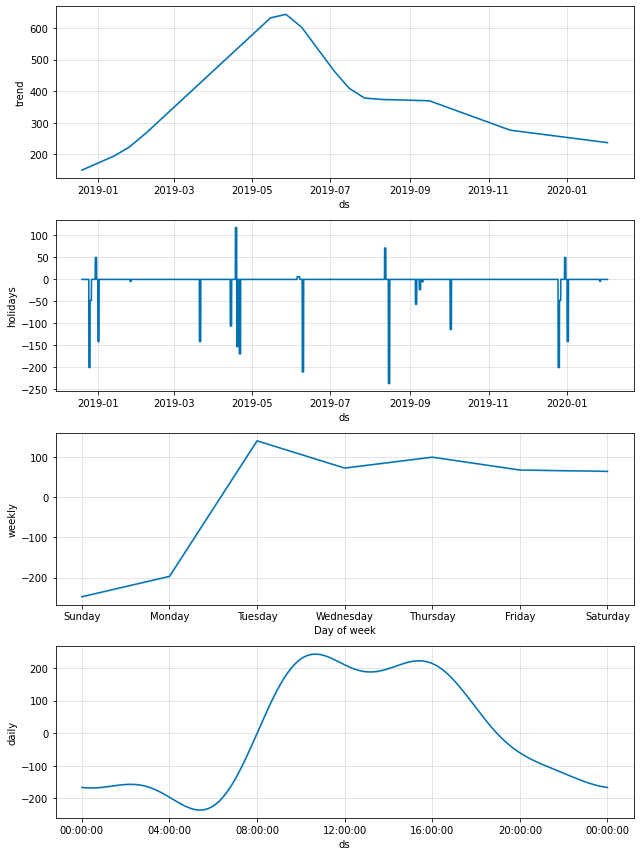

In [29]:
fig = model.plot_components(prediction)

In [30]:
df.head()

,ds,y
0,2018-12-19 15:00:02,250.0
1,2018-12-19 16:00:03,295.0
2,2018-12-19 18:00:02,288.0
3,2018-12-19 19:00:02,286.0
4,2018-12-19 20:00:02,229.0


In [31]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,150.134362,211.778010,712.617854,150.134362,150.134362,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,84.270903,84.270903,84.270903,0.0,0.0,0.0,453.617719
1,2018-12-19 16:00:03,150.208327,189.408890,691.390883,150.208327,150.208327,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,86.617434,86.617434,86.617434,0.0,0.0,0.0,450.462707
2,2018-12-19 18:00:02,150.356193,79.102724,559.650246,150.356193,150.356193,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,91.070645,91.070645,91.070645,0.0,0.0,0.0,319.048873
3,2018-12-19 19:00:02,150.430137,6.957796,478.874596,150.430137,150.430137,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,93.091967,93.091967,93.091967,0.0,0.0,0.0,239.821003
4,2018-12-19 20:00:02,150.504081,-51.958841,430.076284,150.504081,150.504081,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,94.924240,94.924240,94.924240,0.0,0.0,0.0,185.109070


## Errors

In [32]:
true_val = df.y

In [33]:
pred_val = org_prediction['yhat']

In [34]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

35002.197217389774

In [35]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

135.75885490579006

In [36]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
mean_absolute_percentage_error(y_true=true_val,y_pred=pred_val)

1462.2453689941326

In [53]:
df[]

4247

In [38]:
# df_cv = cross_validation(model, initial='300 days', period='35 days', horizon='70 days')
# df_cv.head()

In [39]:
# performance_metrics_results = performance_metrics(df_cv)
# print(performance_metrics_results)

In [40]:
# plot_cross_validation_metric(df_cv, metric='mape')

## Prediction

In [41]:
data = ['2019-10-27 12:00:00']
test = pd.DataFrame(data, columns = ['ds']) 

In [42]:
test.ds

0    2019-10-27 12:00:00
Name: ds, dtype: object

In [43]:
val = model.predict(test)

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [44]:
# val[val.columns[1:]] = np.exp(val[val.columns[1:]])

In [45]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-27 12:00:00,307.934343,-52.320389,419.91902,307.934343,307.934343,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-324.553006,-324.553006,-324.553006,0.0,0.0,0.0,193.155993


In [46]:
np.exp(val['yhat'])

0    7.701617e+83
Name: yhat, dtype: float64

## Saving Model

In [47]:
type(model)

fbprophet.forecaster.Prophet

In [48]:
pkl_path = "model.pkl"

In [49]:
model.stan_backend.logger = None

In [50]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [51]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)